In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [10]:
# Define the column names for the DataFrame
column_names = ['Time', 'CPU', 'Memory']

# Read the lines from the text file
with open('server/usage_20230525155642.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty list to store the extracted data
data = []

# Parse each line and extract the relevant information using regular expressions
for line in lines:
    match = re.match(r'(\d+:\d+:\d+);CPU: ([\d,.]+)%;Memory: ([\d,.]+)%', line)
    if match:
        timestamp, cpu_usage, memory_usage = match.groups()
        
        # Replace commas with periods
        cpu_usage = cpu_usage.replace(',', '.')
        memory_usage = memory_usage.replace(',', '.')
        
        # Convert to float
        cpu_usage = float(cpu_usage)
        memory_usage = float(memory_usage)
        
        # Add the data to your desired container
        data.append((timestamp, cpu_usage, memory_usage))

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=column_names)
df['Memory'] = df['Memory'].astype(float)
df['CPU'] = df['CPU'].astype(float)
# Assuming 'df' is your DataFrame with the desired column named 'Time' as a datetime column
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['T'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()
df['Time'] = df['Time'].dt.strftime('%H:%M:%S')

# Set the 'Time' column as the index of the DataFrame
df.set_index('T', inplace=True)

# Display the DataFrame
print(df)

           Time   CPU   Memory
T                             
0.0    15:56:42   4.3  36.9052
1.0    15:56:43   6.1  36.9496
2.0    15:56:44   0.7  36.8862
2.0    15:56:44   8.3  36.8925
3.0    15:56:45   3.1  36.9052
...         ...   ...      ...
273.0  16:01:15   0.7  42.0505
274.0  16:01:16  35.6  42.5581
275.0  16:01:17   1.5  42.5771
275.0  16:01:17   0.7  42.5961
276.0  16:01:18   6.1  38.1487

[403 rows x 3 columns]


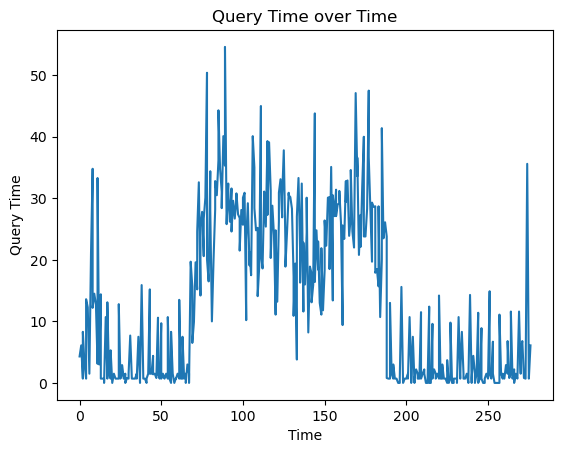

In [12]:
# Plot the desired column as a time series
df['CPU'].plot()

# Set plot title and labels
plt.title('Query Time over Time')
plt.xlabel('Time')
plt.ylabel('Query Time')

# Display the plot
plt.show()